## 결정 트리(Decision Tree)

의사 결정 트리, 의사 결정 나무라고도함, 대표적인 분류 학습 모델, 회귀도 가능, 스무고개와 유사

나무를 거꾸로 뒤 짚어 놓은 모양 : 루트 노드 --> 규칙 노드(중간 노드) --> 리프노드(끝노드)

#### [1] 불순도(Impurity) : 해당 범주안에 서로 다른 데이터가 얼마나 섞여 있는지를 말한다, 불확실성, 무질서도
#### [2] 엔트로피(Entropy) : 불순도를 수치적으로 나타낸 척도, 엔트로피가 높다는 것은 불순도가 높다, 1 이면 불순도가 최대
#### [3] 정보이득(Information Gain) : 1 - 엔트로피
- 결정트리는 분류(구분)한 뒤 각 영역의 순도가 증가, 불순도가 감소하는 방향으로 학습을 진행, 정보이론에서는 정보이득이라고함

#### [4] 지니계수(Gini Coefficient) : 1 - (각 범주별 데이터의 비율의 제곱의 함), 0 이면 최소(끝노드), 1이면 최대

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()

# x 피쳐만 추출
iris_data =  iris.data

# y 답(label)만 추출
iris_label = iris.target

iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label'] = iris_label

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
X_train,X_test, y_train,y_test = train_test_split(iris_data,iris_label, test_size=0.2, random_state=11)  

In [3]:
dt_clf = DecisionTreeClassifier(random_state=11) # random seed 고정

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [4]:
pred = dt_clf.predict(X_test)
pred,y_test

(array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]),
 array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]))

In [5]:
from sklearn.metrics import accuracy_score, classification_report 

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


In [11]:
# 지니계수 : 1 -(각 범주별 데이터의 비율의 제곱의 함), 0 이면 leaf node(끝노드)
# gini = 0.667
# samples = 120
# value = [41, 40, 39]
# class = setosa

gini = 1 - ((41/120)**2 + (40/120)**2 + (39/120)**2)
print(round(gini,3))  # 0.667

# gini = 0.5
# samples = 79
# value = [0, 40, 39]
# class = versicolor
gini = 1 - ((0/79)**2 + (40/79)**2 + (39/79)**2)
print(round(gini,3))  # 0.5

0.667
0.5


feature importance:
[0.025 0.    0.049 0.926]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.049
petal width (cm) : 0.926


<AxesSubplot:>

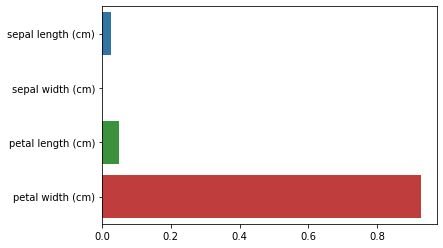

In [12]:
# feauture importance : 결정트리의 규칙노드가 분기 조건으로 사용할 피쳐의 우선 순위
print('feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))
for name, value in zip(iris.feature_names,dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
import seaborn as sns
sns.barplot(x = dt_clf.feature_importances_, y = iris.feature_names)


In [13]:
### GINI 계수 함수 구현

def gini(value):
    array_of_values = np.array(value)
    array_of_sum = array_of_values.sum() # 전체 데이터 수
    squared_sum = 0
    for value in array_of_values:
        squared_sum += (value/array_of_sum)**2
    return round(1 - squared_sum,3)
            
print(gini([41, 40, 39])) # 0.667
print(gini([0, 3, 38]))   # 0.136
print(gini([0, 0, 10])) 

0.667
0.136
0.0


In [14]:
first_df = pd.DataFrame(data=X_train,columns = iris.feature_names)
first_df['label'] = y_train
first_df.shape  # (120, 5)

print(first_df['label'].value_counts())
value = [41,40,39]
print(gini(value)) # gini = 0.667, 지니 계수가 크므로 자식노드(1번과 2번) 브랜치하기로 결정

# 자식 노드 생성
second_node = first_df[first_df['petal width (cm)'] <= 0.8]  # 자식 노드(1번 노드) 생성
third_node = first_df[first_df['petal width (cm)'] > 0.8]    # 자식 노드(2번 노드) 생성
second_node.shape  # (41,5)
third_node.shape

0    41
1    40
2    39
Name: label, dtype: int64
0.667


(79, 5)

In [16]:

# 1번(두번째) 노드 : 첫번째 터미널 노드,리프 노드
# gini = 0.0
# samples = 41
# value = [41, 0, 0]
# class = setosa

print(second_node['label'].value_counts())
value =[41,0,0]
print('gini:',gini(value))  # gini : 0.0, 지니계수가 0이므로 leaf노드가 됨, 더이상 브랜치 하지 않음
print('class:',iris.target_names[0]) # class: setosa

# leaf node인 경우 
setosa_result = second_node.copy()
setosa_result.head()

0    41
Name: label, dtype: int64
gini: 0.0
class: setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
3,5.0,3.3,1.4,0.2,0
4,4.7,3.2,1.6,0.2,0
8,5.5,3.5,1.3,0.2,0
12,4.6,3.4,1.4,0.3,0


In [17]:
# 2번(세번째) 노드 : 규칙 노드
# petal width (cm) <= 1.55
# gini = 0.5
# samples = 79
# value = [0, 40, 39]
# class = versicolor
print(third_node['label'].value_counts())
value = [0, 40, 39]
print('gini:',gini(value))  # gini: 0.5, 지니 계수가 크므로 자식노드(3번과 5번) 브랜치하기로 결정

# 자식 노드 생성
fourth_node = third_node[third_node['petal width (cm)'] <= 1.55] # 자식노드 (3번) 생성
fifth_node = third_node[third_node['petal width (cm)'] > 1.55]   # 자식노드 (5번) 생성
fourth_node.shape # (38, 5)
fifth_node.shape  # 

1    40
2    39
Name: label, dtype: int64
gini: 0.5


(41, 5)

In [18]:
# 3번(네번째) 노드 : 규칙 노드
# petal length (cm) <= 5.25
# gini = 0.051
# samples = 38
# value = [0, 37, 1]
# class = versicolor
print(fourth_node['label'].value_counts())
value = [0, 37, 1]
print('gini:',gini(value))  # gini: 0.051, 지니 계수가 작지만 자식노드(4번과 5번) 브랜치하기로 결정

# 자식 노드 생성
sixth_node = fourth_node[fourth_node['petal length (cm)'] <= 5.25]     # 자식노드 (4번) 생성
seventh_node = fourth_node[fourth_node['petal length (cm)'] > 5.25]    # 자식노드 (5번) 생성
sixth_node.shape    # (37, 5)
seventh_node.shape  # (1, 5)

1    37
2     1
Name: label, dtype: int64
gini: 0.051


(1, 5)

In [21]:

# 4번 노드 : 두 번째 터미널 노드, leaf node
# gini = 0.0
# samples = 37
# value = [0, 37, 0]
# class = versicolor

print(sixth_node['label'].value_counts())
value = [0, 37, 0]
print('gini:',gini(value)) # gini: 0.0
print('class:',iris.target_names[1]) # class: versicolor

versicolor_result = sixth_node.copy()
versicolor_result.head()

1    37
Name: label, dtype: int64
gini: 0.0
class: versicolor


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
10,5.0,2.0,3.5,1.0,1
13,6.9,3.1,4.9,1.5,1
15,5.1,2.5,3.0,1.1,1
16,6.6,2.9,4.6,1.3,1
22,5.9,3.0,4.2,1.5,1


In [22]:
# 5번 노드 : 세 번째 터미널 노드, leaf node
# gini = 0.0
# samples = 1
# value = [0, 0, 1]
# class = virginica
print(seventh_node['label'].value_counts())
value = [0, 0, 1]
print('gini:',gini(value)) # gini: 0.0 , leaf node
print('class:',iris.target_names[2]) # class: virginica

virginica_result = seventh_node.copy()
virginica_result

2    1
Name: label, dtype: int64
gini: 0.0
class: virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
30,6.1,2.6,5.6,1.4,2


In [23]:

# 6번 노드 : 규칙 노드
# petal width (cm) <= 1.75
# gini = 0.136
# samples = 41
# value = [0, 3, 38]
# class = virginica
print(fifth_node['label'].value_counts())
value = [0, 3, 38]
print('gini:',gini(value)) # gini: 0.136 지니계수가 작지만 두가지가 혼합 되어 자식 노드(7번과 12번) 생성

# 자식 노드 생성
eight_node = fifth_node[fifth_node['petal width (cm)'] <= 1.75]  # 자식 노드(7번) 생성
ninth_node = fifth_node[fifth_node['petal width (cm)'] > 1.75]  # 자식 노드(12번) 생성
eight_node.shape  # (4, 5)
ninth_node.shape

2    38
1     3
Name: label, dtype: int64
gini: 0.136


(37, 5)

In [24]:
# 중간 생략  : 7번 ~ 16번 노드(숙제)

In [25]:
fit_result = pd.concat([setosa_result,versicolor_result,virginica_result],axis = 0)
print(fit_result.shape)
print(fit_result['label'].value_counts())

(79, 5)
0    41
1    37
2     1
Name: label, dtype: int64


## 결정 트리의 파라메터 튜닝 : 학습 시간 및 과적합 제어

### 과적합(Overfitting)
- 학습 데이터에서는 예측 정확도가 높이 나오는데 학습에서 사용되지 않은 다른 데이터 셋을 사용하여 예측하면 예측 정확도가 떨어지는 경우, 피쳐가 지나치게 많을때도 발생


### parameter
- max_depth : 트리의 최대 깊이,None, 깊이가 너무 깊으면 과적합
- max_features : 최대 피처 갯수, None , 모든 피처를 사용
- max_leaf_nodes : 리프노드의 최대 갯수, None
- min_samples_leaf : 리프 노드가 되기 위한 최소의 샘플데이터 수, 1
- min_samples_split : 노드를 분할하기 위한 최소의 샘플 데이터 수, 2, 과적합을 제어하는 데 사용


#### 1. max_depth 값 조정 : 트리의 최대 깊이, 깊이가 너무 깊으면 과적합, 정확도에도 영향

In [26]:
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = None) #  정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 1)    #  정확도: 0.6333, 정확도 감소
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 2)    #  정확도: 0.8667, 정확도 감소
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 3)      #  정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 4)    #  정확도: 0.9333

dt_clf.fit(X_train,y_train)

# 예측(predict) 수행
pred = dt_clf.predict(X_test)
pred,y_test

# 정확도 측정 : accuracy
from sklearn.metrics import accuracy_score, classification_report 

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


#### 2. min_samples_split : 노드를 분할하기 위한 최소의 샘플 데이터 수, 2, 과적합을 제어하는 데 사용 , 정확도에도 영향

In [27]:
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 2)      #  정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 4)      #  정확도: 0.9333
dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 41)       #  정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 42)     #  정확도: 0.866, 정확도 감소

dt_clf.fit(X_train,y_train)

# 예측(predict) 수행
pred = dt_clf.predict(X_test)
pred,y_test

# 정확도 측정 : accuracy
from sklearn.metrics import accuracy_score, classification_report 

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


#### 3. min_samples_leaf : 리프 노드가 되기 위한 최소한의 샘플데이터 수, 1

In [28]:
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 1)       #  정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 4)       #  정확도: 0.9333 , 적정값
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 5)       #  정확도: 0.8667 , 정확도가 감소
dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 39)        #  정확도:  0.9333 , 적정값
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 40)      #  정확도:  0.6333, 정확도가 감소

dt_clf.fit(X_train,y_train)

# 예측(predict) 수행
pred = dt_clf.predict(X_test)
pred,y_test

# 정확도 측정 : accuracy
from sklearn.metrics import accuracy_score, classification_report 

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


### 교차 검증

In [29]:
from sklearn.model_selection import cross_val_score

iris_data = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris_data.data , iris_data.target,
                                                test_size = 0.2 , random_state = 11)

dt_clf = DecisionTreeClassifier(random_state=11)

# 학습
dt_clf.fit(X_train,y_train)

# 예측
pred = dt_clf.predict(X_test)

# 정확도  : 1회만 예측한 결과의 정확도
print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 교차 검증(cross validation)
cv_score = cross_val_score(dt_clf,iris_data.data,iris_data.target,  # Estimator,X,Y값
                           scoring='accuracy', cv = 3) # cv = 3, 3개로 쪼개어 검증(predict를 3회 수행)

# 내부적으로 Stratified K-Fold 사용됨, 평가지표를 한개만 구할 수 있어서 StatifiedKFold사용 권장

print('교차 검증 정확도:',cv_score) # [0.98039216 0.92156863 0.97916667]
print('교차 검증 평균 정확도:',np.round(np.mean(cv_score),4)) # 0.9604 

정확도: 0.9333
교차 검증 정확도: [0.98 0.92 0.98]
교차 검증 평균 정확도: 0.96


### K-fold

In [31]:
from sklearn.model_selection import KFold
iris = load_iris()
features = iris.data
label = iris.target

features.shape  # (150, 4)
label.shape     # (150,)

dt_clf = DecisionTreeClassifier(random_state=11)

In [33]:
kfold = KFold(n_splits = 5)
cv_accuracy = []
n_iter = 0

for train_index,test_index in kfold.split(features):
    # kfold.split()함수 : X데이터 features를 분리하여 학습/검증용 데이터의 인덱스를 반환
    
    # 150개 데이터
    # k 값(n_splits) : 폴드세트 갯수, 학습:검증  검증 데이터의 비율
    #     2          :   2            75:75      1/2(50%)
    #     3          :   3            100:50     1/3(33%)
    #     4          :   4            112:38     1/4(25%)
    #     5          :   5            120:30     1/5(20%)
    #     6          :   6            125:25     1/6(16.7%)
    
    X_train = features[train_index]
    X_test = features[test_index]
    
    y_train = label[train_index]
    y_test = label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1

    # 반복시 마다 정확도 측정
    accuracy = round(accuracy_score(y_test,pred),4)
    cv_accuracy.append(accuracy)

# K폴드로 반복된 정확도를 합하여 평균 정확도 계산
print('K폴드 교차 검증 평균 정확도:', round(np.mean(cv_accuracy),3))

K폴드 교차 검증 평균 정확도: 0.92


## Stratified K-Fold : 분류에서 필수 사용!!
- label 이 지나치게 불균형 분포를 이룰 때 레이블의 분포를 균일하게 폴드시키는 방식
- 분류모델에서만 가능(회귀는 지원되지 않음)

In [34]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

kfold = KFold(n_splits = 5, shuffle=True)  # shuffle과 Stratified는 성능이 다름
n_iter = 0
for train_index,test_index in kfold.split(features):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n[',n_iter,'번 폴드 세트]')
    print(label_train.value_counts())  # 120개
    print(label_test.value_counts())   # 30개  , 레이블이 불균형 분포를 이룬다


[ 1 번 폴드 세트]
0    41
2    40
1    39
Name: label, dtype: int64
1    11
2    10
0     9
Name: label, dtype: int64

[ 2 번 폴드 세트]
2    42
0    41
1    37
Name: label, dtype: int64
1    13
0     9
2     8
Name: label, dtype: int64

[ 3 번 폴드 세트]
1    44
2    38
0    38
Name: label, dtype: int64
2    12
0    12
1     6
Name: label, dtype: int64

[ 4 번 폴드 세트]
0    43
2    39
1    38
Name: label, dtype: int64
1    12
2    11
0     7
Name: label, dtype: int64

[ 5 번 폴드 세트]
1    42
2    41
0    37
Name: label, dtype: int64
0    13
2     9
1     8
Name: label, dtype: int64


In [35]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
n_iter =0

for train_index,test_index in skf.split(iris_df,iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n[',n_iter,'번 폴드 세트]')
    print(label_train.value_counts())  # 120개
    print(label_test.value_counts())


[ 1 번 폴드 세트]
2    40
1    40
0    40
Name: label, dtype: int64
2    10
1    10
0    10
Name: label, dtype: int64

[ 2 번 폴드 세트]
2    40
1    40
0    40
Name: label, dtype: int64
2    10
1    10
0    10
Name: label, dtype: int64

[ 3 번 폴드 세트]
2    40
1    40
0    40
Name: label, dtype: int64
2    10
1    10
0    10
Name: label, dtype: int64

[ 4 번 폴드 세트]
2    40
1    40
0    40
Name: label, dtype: int64
2    10
1    10
0    10
Name: label, dtype: int64

[ 5 번 폴드 세트]
2    40
1    40
0    40
Name: label, dtype: int64
2    10
1    10
0    10
Name: label, dtype: int64


In [36]:
skf = StratifiedKFold(n_splits=5)
cv_accuracy = []
n_iter =0

for train_index,test_index in skf.split(iris_df,iris_df['label']): # Y 레이블을 반드시 인자로 사용
    X_train = features[train_index]
    X_test = features[test_index]
    
    y_train = label[train_index]
    y_test = label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    
    # 반복시 마다 정확도 측정
    accuracy = round(accuracy_score(y_test,pred),4)
    cv_accuracy.append(accuracy)

# StratifiedKFold로 반복된 정확도를 합하여 평균 정확도 계산
print('StratifiedKFold 교차 검증 평균 정확도:', round(np.mean(cv_accuracy),4)) #  0.96

# StratifiedKFold로 레이블의 분포를 균일하게 폴드를 생성하여 학습시키므로 정확도가 향상됨 : 0.92-->0.96

StratifiedKFold 교차 검증 평균 정확도: 0.96


## GridSearchCV

- 교차 검증과 파라메터 집합을 만들어 주면 최적의 파라메터 값을 구해줌¶

In [38]:
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,
                                                random_state=11)
dt_clf = DecisionTreeClassifier(random_state=11)  # Estimator

# 파라메터들을 dict 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [39]:
grid_tree = GridSearchCV(dt_clf, param_grid=parameters,cv=3, refit=True,return_train_score=True)
grid_tree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
          'split0_train_score','split1_train_score','split2_train_score']]

,params,mean_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.675000,5,0.6750,0.6750,0.6750
1,"{'max_depth': 1, 'min_samples_split': 3}",0.675000,5,0.6750,0.6750,0.6750
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.9875,0.9500,0.9750
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.9875,0.9500,0.9750
4,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,1,0.9875,0.9625,0.9875
5,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,1,0.9875,0.9625,0.9875


In [40]:
print('GridSearchCV 최적 파라메터:',grid_tree.best_params_)
print('GridSearchCV 최고 정확도:',grid_tree.best_score_)

GridSearchCV 최적 파라메터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9666666666666667


In [41]:
pred = grid_tree.predict(X_test)
print(accuracy_score(y_test,pred))

0.9333333333333333


In [42]:
esimator = grid_tree.best_estimator_  # estimator : DecisionTreeClassifier
pred = esimator.predict(X_test)
print(accuracy_score(y_test,pred))

0.9333333333333333
